In [1]:
%reset

from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join, isdir

database_dir = './ANFR Dataset'              #It should be made sure that there are equal number of data and ref folders here

pre_processed_dir = './Pre-processed data'

#------------The main data directory contains data and ref folder for each month's data------------#
folders_in_data_dir = [folder for folder in listdir(database_dir) if isdir(join(database_dir, folder))]
data_tables_folder = [folder for folder in folders_in_data_dir if (("ref" not in folder) and ("Ref" not in folder))]
reference_folder = [folder for folder in folders_in_data_dir if (("ref" in folder) or ("Ref" in folder))]

#already_processed = [file.split('.')[0] for file in listdir(pre_processed_dir) if isfile(join(pre_processed_dir, file))]
already_processed = ['20150401', '20150501', '20150602', '20150701', '20150801', '20150829', '20150926', '20151031', '20151128', '20160109', '20160130', '20160227', '20160402', '20160430', '20160528', '20160630', '20160730', '20160827', '20160930', '20161028', '20161126', '20161224', '20170128', '20170225', '20170401', '20170429', '20170531', '20170701', '20170729', '20170831', '20171005', '20171031', '20171130', '20171222', '20180131', '20180228', '20180330', '20180427', '20180531', '20180629', '20180801', '20180831', '20180930', '20181031', '20181130', '20181231', '20190131', '20190228', '20190331', '20190430', '20190529', '20190628', '20190801', '20190830', '20191001', '20191031', '20191129', '20200101', '20200131', '20200301', '20200401', '20200430', '20200529', '20200630', '20200731', '20200831', '20200930', '20201030', '20201201', '20210107', '20210129', '20210226', '20210331', '20210503', '20210531', '20210630', '20210801', '20210930', '20211029', '20211130', '20211223', '20220131', '20220228', '20220331', '20220429', '20220531', '20220630', '20220729', '20220831']

print("------------------------------------ALL Folders------------------------------------")
print(folders_in_data_dir)

print("------------------------------------Data Folders------------------------------------")
print(data_tables_folder)

print("------------------------------------Reference Folders------------------------------------")
print(reference_folder)

print("------------------------------------Dates already Processed------------------------------------")
print(already_processed)

total_num_bs_df = pd.DataFrame(columns=['Dates', 'Total_NUM_BSs'])         #We will save this in a file at the end. For comparison with the number of stations of the 4 main operators.
if 'NUM_STATIONS' in already_processed:
    total_num_bs_df = pd.read_csv(join(pre_processed_dir, 'NUM_STATIONS.txt'), sep = ';')

------------------------------------ALL Folders------------------------------------
['20150602_DATA', '20150602_Tables_de_reference', '20150701_DATA', '20150701_Tables_de_reference', '20150801_DATA', '20150801_Tables_de_reference', '20150829_DATA', '20150829_Tables_de_reference', '20150926_DATA', '20150926_Tables_de_reference', '20151031_DATA', '20151031_Tables_de_reference', '20151128_DATA', '20151128_Tables_de_reference', '20160109_DATA', '20160109_Tables_de_reference', '20160130_DATA', '20160130_Tables_de_reference', '20160227_DATA', '20160227_Tables_de_reference', '20160402_DATA', '20160402_Tables_de_reference', '20160402_Tables_de_reference (1)', '20160430_DATA', '20160528_DATA', '20160528_Tables_de_reference', '20160630_DATA', '20160702_Tables_de_reference', '20160730_DATA2', '20160730_Tables_de_reference', '20160827_DATA', '20160827_Tables_de_reference', '20160930_DATA', '20160930_Tables_de_reference', '20161028_DATA', '20161028_Tables_de_reference', '20161126_DATA', '20161126_T

In [2]:
#---------------------------------Finding the mapping between the data and the ref folders---------------------------------#
dates = []
mapped_folders = []       #This list will contain each data and ref folder name in sequence. First data then ref for the same month and then so on.

months = ['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'aout', 'septembre', 'octobre', 'novembre', 'décembre']

for current_data_folder in data_tables_folder:
    mapped_folders.append(current_data_folder)

    data_date = ''
    #---------if data folder is named in this format -->'tables-supports-antennes-emetteurs-bandes-janvier-2020'---------#
    for month in months:
        if month in current_data_folder:
            month_number = months.index(month) + 1
            if month_number < 10:
                month_number = '0' + str(month_number)
            year = current_data_folder.split('-')[6]
            day = '01'
            data_date = year + month_number + day
    #---------if data folder is named in this format -->'20211029-export-etalab-data'---------Doesn't matter if there is no data in the name#
    if data_date == '':
        if len(current_data_folder.split('-')) > 1:
            data_date = current_data_folder.split('-')[0]
        else:
            data_date = current_data_folder.split('_')[0]    #Some folders use underscore instead of dash
    dates.append(data_date)

    for current_ref_folder in reference_folder:
        ref_date = ''
        #---------if ref folder is named in this format -->'table-de-reference-mars-2020'---------#
        for month in months:
            if month in current_ref_folder:
                month_number = months.index(month) + 1
                if month_number < 10:
                    month_number = '0' + str(month_number)
                year = current_ref_folder.split('-')[4]
                day = '01'
                ref_date = year + month_number + day
        #---------if data folder is named in this format -->'20210801-export-etalab-ref'---------#
        if ref_date == '':
            if len(current_ref_folder.split('-')) > 1:
                ref_date = current_ref_folder.split('-')[0]
            else:
                ref_date = current_ref_folder.split('_')[0]    #Some folders use underscore instead of dash

        date_diff = abs(datetime.strptime(data_date, '%Y%m%d') - datetime.strptime(ref_date, '%Y%m%d'))

        if date_diff < timedelta(days = 7):     #Assuming that the difference between the upload of data and ref folders won't be more than 5 days. Less than 5 days mean they belong to the same set. Also assuming that different months data is uploade after atleast 5 days
            mapped_folders.append(current_ref_folder)
            break

print("----------------------Dates----------------------")
print(dates)

print("----------------------Mapped Folders (In a list one after the another)----------------------")
print(mapped_folders)

----------------------Dates----------------------
['20150602', '20150701', '20150801', '20150829', '20150926', '20151031', '20151128', '20160109', '20160130', '20160227', '20160402', '20160430', '20160528', '20160630', '20160730', '20160827', '20160930', '20161028', '20161126', '20161224', '20170128', '20170225', '20170401', '20170429', '20170531', '20170701', '20170729', '20170831', '20171005', '20171031', '20171130', '20180131', '20180330', '20180427', '20180629', '20180801', '20180831', '20180930', '20181031', '20181130', '20181231', '20190131', '20190228', '20190331', '20190430', '20190529', '20190628', '20190801', '20190830', '20191001', '20191031', '20191129', '20200131', '20200430', '20200529', '20200630', '20200731', '20200831', '20200930', '20201030', '20201201', '20210107', '20210129', '20210226', '20210331', '20210503', '20210531', '20210630', '20210801', '20210831', '20210930', '20211029', '20211130', '20211223', '20220131', '20220228', '20220429', '20220531', '20220630', '

In [3]:
#Methods for using below: For adding the FDD BW and TDD BW columns in the dataframe.
def add_FDD_BW_col(row):
    if row['DUPLEX_TYPE'] == 'F' or row['DUPLEX_TYPE'] == 'T&F':
        return row['BW']
    else:
        return 0

def add_TDD_BW_col(row):
    if row['DUPLEX_TYPE'] == 'T' or row['DUPLEX_TYPE'] == 'T&F':
        return row['BW']
    else:
        return 0

In [4]:
encoding_type = 'latin1'              #This type of encoding is well adapted for Western European languages.

for i in range(0, len(mapped_folders), 2):
    data_path = join(database_dir, mapped_folders[i])
    reference_path = join(database_dir, mapped_folders[i + 1])

    data_date = dates[i//2]

    if data_date in already_processed:
        continue

    print("Currently Pre-Processing")
    print(data_path)
    print(reference_path)

    #-----------------Converting reference files to dataframes - will be used to find mapping in the data files-----------------#
    operators_df = pd.read_csv(join(reference_path, 'SUP_EXPLOITANT.txt'), sep = ';', dtype=str, encoding=encoding_type, on_bad_lines='skip')       #Not entirely sure why but this encoding type works for all. On_bad_lines for ID 244 -->skipping it.
    antenna_type_df = pd.read_csv(join(reference_path, 'SUP_TYPE_ANTENNE.txt'), sep = ';', dtype=str, encoding=encoding_type)
    #-----------------Creating dictionaries from the reference dataframes-----------------#
    operators_mapping = operators_df.set_index('ADM_ID').T.to_dict('index')
    operators_mapping = operators_mapping['ADM_LB_NOM']                    #The actual dictionary is a nested dictionary

    antenna_type_mapping = antenna_type_df.set_index('TAE_ID').T.to_dict('index')
    antenna_type_mapping = antenna_type_mapping['TAE_LB']                  #The actual dictionary is a nested dictionary

    #-----------------Reading actual datafiles as panda dataframes-----------------#
    station_df = pd.read_csv(join(data_path, 'SUP_STATION.txt'), sep = ';', dtype=str, encoding=encoding_type)

    #In earlier files this header is not capitalized so we need to check and get it so that we can extract this col if needed
    service_date_col_name = ''
    col_names_in_station_df = station_df.columns
    for col_name in col_names_in_station_df:
            if 'dte_en_service' in col_name.lower():
                service_date_col_name = col_name

    station_df = station_df[['STA_NM_ANFR','ADM_ID', service_date_col_name]]                                                   #Selecting all the stations assuming all are in service
    #In some earlier data files, in the ADM_ID column there are commas in the data file but not in the reference file so we need to take care of this
    station_df['ADM_ID'] = station_df['ADM_ID'].str.split(',').str.get(0)
    #----------------------Replacing the values in the data columns using the reference----------------------#
    station_df['ADM_ID'] = station_df['ADM_ID'].map(operators_mapping)

    antenna_df = pd.read_csv(join(data_path, 'SUP_ANTENNE.txt'), sep = ';', dtype=str, encoding=encoding_type)
    antenna_df = antenna_df[['STA_NM_ANFR', 'AER_ID', 'TAE_ID']]
    #----------------------Replacing the values in the data columns using the reference----------------------#
    antenna_df['TAE_ID'] = antenna_df['TAE_ID'].map(antenna_type_mapping)

    transmitter_df = pd.read_csv(join(data_path, 'SUP_EMETTEUR.txt'), sep = ';', dtype=str, encoding=encoding_type)

    transmitter_df = transmitter_df[['STA_NM_ANFR', 'EMR_ID', 'EMR_LB_SYSTEME', 'AER_ID']]
    #-----------------------Only cellular systems-----------------------#
    cellular_systems = ['GSM', 'UMTS', 'LTE', '5G']
    transmitter_df = transmitter_df[transmitter_df['EMR_LB_SYSTEME'].str.split(' ').str[0].isin(cellular_systems)]
    transmitter_df = transmitter_df[~transmitter_df['EMR_LB_SYSTEME'].str.contains(" Expe")]             #No experimential bands
    transmitter_df = transmitter_df[~transmitter_df['EMR_LB_SYSTEME'].str.contains(" R")]                #No GSM R
    transmitter_df = transmitter_df[~transmitter_df['EMR_LB_SYSTEME'].str.contains(" P")]                #No Private LTE

    band_df = pd.read_csv(join(data_path, 'SUP_BANDE.txt'), sep = ';', dtype=str, encoding=encoding_type)
    band_df = band_df[['STA_NM_ANFR', 'BAN_ID', 'EMR_ID', 'BAN_NB_F_DEB', 'BAN_NB_F_FIN', 'BAN_FG_UNITE']]

    #--------------Sequential inner join operations to create one single dataframe--------------#
    station_antenna_df = station_df.merge(antenna_df, on = ['STA_NM_ANFR'])
    station_antenna_transmitter_df = station_antenna_df.merge(transmitter_df, on = ['AER_ID', 'STA_NM_ANFR'])
    all_df = station_antenna_transmitter_df.merge(band_df, on = ['EMR_ID', 'STA_NM_ANFR'])

    #Dropping any rows with NaN values #Especially, where DT_EN_SERVICE is null, we are assuming that the stations are not in service.
    all_df = all_df.dropna()

    #--------------Saving the total number of in service base stations--------------#
    num_bs = all_df['STA_NM_ANFR'].nunique()
    row = [data_date, num_bs]
    total_num_bs_df.loc[-1] = row
    total_num_bs_df =  total_num_bs_df.reset_index(drop=True)

    #-----------------------Selecting the stations only from the main cellular operators-----------------------#
    main_operators = ['BOUYGUES TELECOM', 'ORANGE', 'SFR', 'FREE MOBILE']
    all_df = all_df.loc[all_df['ADM_ID'].isin(main_operators)]

    #--------------Replacing comma with decimal--------------#
    all_df['BAN_NB_F_DEB'] = all_df['BAN_NB_F_DEB'].str.replace(',','.')
    all_df['BAN_NB_F_FIN'] = all_df['BAN_NB_F_FIN'].str.replace(',','.')

    #--------------------Removing unnecessary info from the perspective of energy consumption calculations. Also summarizing and compressing the information for faster anlysis in the next stage--------------------#
    all_df['BW'] = all_df['BAN_NB_F_FIN'].astype(float) - all_df['BAN_NB_F_DEB'].astype(float)
    all_df['BW'] = all_df['BW'].round(1)

    all_df = all_df.drop(['BAN_NB_F_FIN', 'BAN_ID', 'AER_ID'], axis = 1)       #Not dropping the date column now as we require this for power calculations

    all_df = all_df.groupby(['STA_NM_ANFR', service_date_col_name, 'ADM_ID', 'TAE_ID', 'EMR_ID', 'EMR_LB_SYSTEME', 'BW', 'BAN_FG_UNITE']).nunique()              #Grouping the columns based on the specified columns --> This would return the number of unique values (per set) for the other columns which are not specified

    #-------The previous step returns --> Index ('STA_NM_ANFR', 'ADM_ID', 'TAE_ID', ' EMR_LB_SYSTEME', 'EMR_ID', 'BW') Columns ('BAN_NB_F_DEB'), the columns actually tell the number of unique values for each index
    #In the above dataframe if there are 2 values for starting frequency it is FDD (meaning 2 bands - one for the uplink while the other for the downlink) while 1 denotes TDD.
    #There are cases where there is a 3 in the starting frequency column.
    #This means that the transceiver implements both TDD & FDD. (2 starting frequencies for FDD while 1 for TDD)
    #This case will occur only for SFR in the 2.1 GHZ band because the BW for SFR (5.0MHZ) is same for TDD and FDD.

    #----Hence mentioning FDD or TDD in the dataframe----#
    all_df['BAN_NB_F_DEB'] = all_df['BAN_NB_F_DEB'].map({1 : 'T', 2 : 'F', 3:'T&F'})
    all_df = all_df.rename(columns={'BAN_NB_F_DEB': 'DUPLEX_TYPE'})

    #-------Creating the index back into the columns-------#
    all_df = all_df.reset_index(level=['STA_NM_ANFR', service_date_col_name, 'ADM_ID', 'TAE_ID', 'EMR_LB_SYSTEME', 'EMR_ID', 'BW', 'BAN_FG_UNITE'])

    #-------Applying the function to specify the FDD and TDD BWs with respect to each BW for each transceiver.
    all_df['FDD_BW'] = all_df.apply(add_FDD_BW_col, axis=1)
    all_df['TDD_BW'] = all_df.apply(add_TDD_BW_col, axis=1)

    all_df = all_df.drop(['BW', 'DUPLEX_TYPE'], axis = 1)      #dropping the columns that we don't require anymore

    #Also note that the mentioned Bandwidth for FDD is half (only transmit or receive not combined) while for TDD, the mentioned bandwidth is the whole bandwidth

    #Getting the aggregate FDD and TDD BW for each transceiver
    all_df = all_df.groupby(['STA_NM_ANFR', service_date_col_name, 'ADM_ID', 'TAE_ID', 'EMR_ID', 'EMR_LB_SYSTEME', 'BAN_FG_UNITE'])[['FDD_BW', 'TDD_BW']].sum()

    #-------Creating the index back into the columns-------#
    all_df = all_df.reset_index(level=['STA_NM_ANFR', service_date_col_name, 'ADM_ID', 'TAE_ID', 'EMR_ID', 'EMR_LB_SYSTEME', 'BAN_FG_UNITE'])

    #-----------------------------Renaming the headers to make them more clear-----------------------------#
    all_df = all_df.rename(columns={'STA_NM_ANFR': 'BS_ID', service_date_col_name: 'DoS', 'ADM_ID': 'OPR_NAME', 'TAE_ID': 'ANT_TYPE', 'EMR_ID': 'TRX_ID', 'EMR_LB_SYSTEME': 'System', 'BAN_FG_UNITE': 'BW_UNIT'})
    all_df = all_df.reindex(columns=['BS_ID', 'DoS', 'OPR_NAME', 'ANT_TYPE', 'TRX_ID', 'System', 'FDD_BW', 'TDD_BW', 'BW_UNIT'])

    #-----------------------------Saving the dataframe to a textfile-----------------------------#
    all_df.to_csv(join(pre_processed_dir, data_date) + '.txt', sep =';', index=False)
    print("-------------------------------------------------------------")

#----------------Writing the total num of stations to a textfile----------------#
total_num_bs_df.to_csv(join(pre_processed_dir, 'NUM_STATIONS.txt'), sep =';', index=False, encoding=encoding_type)

Currently Pre-Processing
./ANFR Dataset\20210930-export-etalab-data
./ANFR Dataset\20210930-export-etalab-ref
-------------------------------------------------------------
Currently Pre-Processing
./ANFR Dataset\20221028-export-etalab-data
./ANFR Dataset\20221028-export-etalab-ref
-------------------------------------------------------------
Currently Pre-Processing
./ANFR Dataset\20221130-export-etalab-data
./ANFR Dataset\20221130-export-etalab-ref
-------------------------------------------------------------
Currently Pre-Processing
./ANFR Dataset\20221223-export-etalab-data
./ANFR Dataset\20221223-export-etalab-ref
-------------------------------------------------------------
Currently Pre-Processing
./ANFR Dataset\20230301-export-etalab-data
./ANFR Dataset\20230301-export-etalab-ref
-------------------------------------------------------------
Currently Pre-Processing
./ANFR Dataset\20230331-export-etalab-data
./ANFR Dataset\20230402-export-etalab-ref
------------------------------

In [5]:
from datetime import datetime, timedelta
from os import listdir
from os.path import isfile, join, isdir
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def processing_total_BS_num_df(total_bs_num_df):
    total_bs_num_df['Dates'] = pd.to_datetime(total_bs_num_df['Dates'], format= '%Y%m%d')          #converting the string to datetime format
    total_bs_num_df = total_bs_num_df.drop_duplicates(keep='first')                                #In case the num station file has multiple repeated rows. This can emerge if u delete a few pre-processed files (without deleting the corresponding rows in the NUM_STATIONS file) and then run the pre-processing code
    total_bs_num_df = total_bs_num_df.sort_values('Dates')

    return total_bs_num_df

def BS_per_OPR_time_series(all_df, total_bs_num_main_opr, total_bs_num_ORANGE, total_bs_num_SFR, total_bs_num_BT, total_bs_num_FREE):
    total_bs_num_main_opr.append(all_df['BS_ID'].nunique())
    num_bs_per_opr = all_df[['BS_ID', 'OPR_NAME']].drop_duplicates(keep='first')['OPR_NAME'].value_counts()
    total_bs_num_SFR.append(num_bs_per_opr['SFR'])
    total_bs_num_ORANGE.append(num_bs_per_opr['ORANGE'])
    total_bs_num_BT.append(num_bs_per_opr['BOUYGUES TELECOM'])
    total_bs_num_FREE.append(num_bs_per_opr['FREE MOBILE'])
    return

def BS_per_TECH_time_series(all_df, total_bs_num_2G, total_bs_num_3G, total_bs_num_4G, total_bs_num_5G, total_bs_num_2G_3G, total_bs_num_2G_3G_4G, total_bs_num_2G_3G_4G_5G, total_bs_num_3G_4G, total_bs_num_3G_4G_5G, total_bs_num_4G_5G,total_bs_num_2G_4G, total_bs_num_2G_5G, total_bs_num_2G_4G_5G, total_bs_num_2G_3G_5G, total_bs_num_3G_5G):
    temp_df = all_df[['BS_ID', 'System']].drop_duplicates(keep='first')
    temp_df['System'] = temp_df['System'].str.split(' ').str[0]
    temp_df = temp_df.drop_duplicates(keep='first')
    groups = temp_df.groupby('BS_ID')['System'].apply(list)

    c_2G = 0            #C stands for counter
    c_3G = 0
    c_4G = 0
    c_5G = 0
    c_2G_3G = 0
    c_2G_3G_4G = 0
    c_2G_3G_4G_5G = 0
    c_3G_4G = 0
    c_3G_4G_5G = 0
    c_4G_5G = 0

    c_2G_4G = 0
    c_2G_5G = 0
    c_2G_4G_5G = 0
    c_2G_3G_5G = 0
    c_3G_5G = 0

    for systems in groups:
        if set(systems) == set(['GSM']):
            c_2G += 1
        elif set(systems) == set(['UMTS']):
            c_3G += 1
        elif set(systems) == set(['LTE']):
            c_4G += 1
        elif set(systems) == set(['5G']):
            c_5G += 1
        elif set(systems) == set(['GSM', 'UMTS']):
            c_2G_3G += 1
        elif set(systems) == set(['GSM', 'UMTS', 'LTE']):
            c_2G_3G_4G += 1
        elif set(systems) == set(['GSM', 'UMTS', 'LTE', '5G']):
            c_2G_3G_4G_5G += 1
        elif set(systems) == set(['UMTS', 'LTE']):
            c_3G_4G += 1
        elif set(systems) == set(['UMTS', 'LTE', '5G']):
            c_3G_4G_5G += 1
        elif set(systems) == set(['LTE', '5G']):
            c_4G_5G += 1
        elif set(systems) == set(['GSM', 'LTE']):
            c_2G_4G += 1
        elif set(systems) == set(['GSM', '5G']):
            c_2G_5G += 1
        elif set(systems) == set(['GSM', 'LTE', '5G']):
            c_2G_4G_5G += 1
        elif set(systems) == set(['GSM', 'UMTS', '5G']):
            c_2G_3G_5G += 1
        elif set(systems) == set(['UMTS', '5G']):
            c_3G_5G += 1

    total_bs_num_2G.append(c_2G)
    total_bs_num_3G.append(c_3G)
    total_bs_num_4G.append(c_4G)
    total_bs_num_5G.append(c_5G)
    total_bs_num_2G_3G.append(c_2G_3G)
    total_bs_num_2G_3G_4G.append(c_2G_3G_4G)
    total_bs_num_2G_3G_4G_5G.append(c_2G_3G_4G_5G)
    total_bs_num_3G_4G.append(c_3G_4G)
    total_bs_num_3G_4G_5G.append(c_3G_4G_5G)
    total_bs_num_4G_5G.append(c_4G_5G)
    total_bs_num_2G_4G.append(c_2G_4G)
    total_bs_num_2G_5G.append(c_2G_5G)
    total_bs_num_2G_4G_5G.append(c_2G_4G_5G)
    total_bs_num_2G_3G_5G.append(c_2G_3G_5G)
    total_bs_num_3G_5G.append(c_3G_5G)
    return

def TRX_per_TECH_time_series(all_df, total_trx_num, trx_num_2G, trx_num_3G, trx_num_4G, trx_num_5G):
    temp_df = all_df[['TRX_ID', 'System']].drop_duplicates(keep='first')      #Drop actually does nothing here as there are no duplicates but for some reason it stops the warning which would otherwise have come after the next line of code
    total_trx_num.append(temp_df['TRX_ID'].nunique())       #We can also just take the len as the number of lines in the df is equal to the number of transceivers

    temp_df['System'] = temp_df['System'].str.split(' ').str[0]
    groups = temp_df.groupby('System')['TRX_ID'].count()

    trx_num_2G.append(groups['GSM'])
    trx_num_3G.append(groups['UMTS'])
    trx_num_4G.append(groups['LTE'])

    if ('5G' in groups.keys()):
        trx_num_5G.append(groups['5G'])
    else:
        trx_num_5G.append(0)
    return

def plot_BS_per_TECH_time_series(dates, total_bs_num_main_opr, total_bs_num_2G, total_bs_num_3G, total_bs_num_4G, total_bs_num_5G, total_bs_num_2G_3G, total_bs_num_2G_3G_4G, total_bs_num_2G_3G_4G_5G, total_bs_num_3G_4G, total_bs_num_3G_4G_5G, total_bs_num_4G_5G,total_bs_num_2G_4G, total_bs_num_2G_5G, total_bs_num_2G_4G_5G, total_bs_num_2G_3G_5G, total_bs_num_3G_5G):
    plt.plot(dates, total_bs_num_main_opr, color='purple', label='All Generations', linewidth=5)

    plt.plot(dates, total_bs_num_2G, color='green', label='2G', linewidth=5)

    plt.plot(dates, total_bs_num_3G, color='orange', label='3G', linewidth=5)

    plt.plot(dates, total_bs_num_2G_3G, color='yellow', label='2G/3G', linewidth=5)

    plt.plot(dates, total_bs_num_2G_3G_4G, color='pink', label='2G/3G/4G', linewidth=5)

    plt.plot(dates, total_bs_num_2G_3G_4G_5G, color='brown', label='2G/3G/4G/5G', linewidth=5)

    plt.plot(dates, total_bs_num_3G_4G, color='black', label='3G/4G', linewidth=5)

    plt.plot(dates, total_bs_num_3G_4G_5G, color='cyan', label='3G/4G/5G', linewidth=5)

    plt.axvline(x = datetime(2020, 12, 1), color = 'b', linestyle='dashed')

    plt.legend(fontsize=21)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    plt.ylabel("Number of In Service BSs", fontsize=24)

    plt.ylim(ymin = 0)
    # Save Image
    plt.savefig('./Graphs/BSs_by_Technology.pdf')
    # Show graphic
    plt.show()

    return

def plot_TRX_per_TECH_time_series(dates, total_trx_num, trx_num_2G, trx_num_3G, trx_num_4G, trx_num_5G):
    plt.plot(dates, total_trx_num, color='purple', label='All Generations', linewidth=5)

    plt.plot(dates, trx_num_2G, color='green', label='2G', linewidth=5)

    plt.plot(dates, trx_num_3G, color='orange', label='3G', linewidth=5)

    plt.plot(dates, trx_num_4G, color='red', label='4G', linewidth=5)

    plt.plot(dates, trx_num_5G, color='blue', label='5G', linewidth=5)

    plt.axvline(x = datetime(2020, 12, 1), color = 'b', linestyle='dashed')

    plt.legend(fontsize=21)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    plt.ylabel("Number of Transceivers", fontsize=24)

    plt.ylim(ymin = 0)
    # Save Image
    plt.savefig('./Graphs/TRX_by_Technology.pdf')
    # Show graphic
    plt.show()

    return

def BS_CGR(dates, total_bs_num_main_opr):
    final_val = total_bs_num_main_opr[len(total_bs_num_main_opr) - 1]

    initial_val = total_bs_num_main_opr[0]
    time_months = len(dates) - 1                    #minus 1 because the first date is the starting point
    time_years = time_months / 12

    cagr = ((final_val/initial_val)**(1/time_years)) - 1
    print ('BS CAGR:', cagr)

    #After 5G
    start_date_5G_index = dates.index(datetime(2020, 10, 30))
    initial_val_5G = total_bs_num_main_opr[start_date_5G_index]

    time_months = (len(dates) - start_date_5G_index) - 1                    #minus 1 because the first date is the starting point
    time_years = time_months / 12

    cagr_5G = ((final_val/initial_val_5G)**(1/time_years)) - 1
    print ('BS CAGR after 5G:', cagr_5G)

    return

def TRX_CGR(dates, total_trx_num):
    final_val = total_trx_num[len(total_trx_num) - 1]

    initial_val = total_trx_num[0]
    time_months = len(dates) - 1                    #minus 1 because the first date is the starting point
    time_years = time_months / 12
    cagr = ((final_val/initial_val)**(1/time_years)) - 1
    print ('TRX CAGR:', cagr)

    #After 5G
    final_val = total_trx_num[len(total_trx_num) - 1]                         #Checking

    start_date_5G_index = dates.index(datetime(2020, 10, 30))
    initial_val_5G = total_trx_num[start_date_5G_index]

    time_months = ((len(dates)) - start_date_5G_index) - 1                    #minus 1 because the first date is the starting point
    time_years = time_months / 12

    cagr_5G = ((final_val/initial_val_5G)**(1/time_years)) - 1
    print ('TRX CAGR after 5G:', cagr_5G)

    return

------------------------ALL Pre-Processed Files------------------------
['20210831.txt', '20220930.txt', '20221028.txt', '20221130.txt', '20221223.txt', '20230301.txt', '20230331.txt', '20230402.txt', '20230428.txt']
-----------------------------------------------------------------------
----------------------Generating Time Series Graphs----------------------
------------Currently Processing------------
20210831.txt
------------Currently Processing------------
20220930.txt
------------Currently Processing------------
20221028.txt
------------Currently Processing------------
20221130.txt
------------Currently Processing------------
20221223.txt
------------Currently Processing------------
20230301.txt
------------Currently Processing------------
20230331.txt
------------Currently Processing------------
20230402.txt
------------Currently Processing------------
20230428.txt


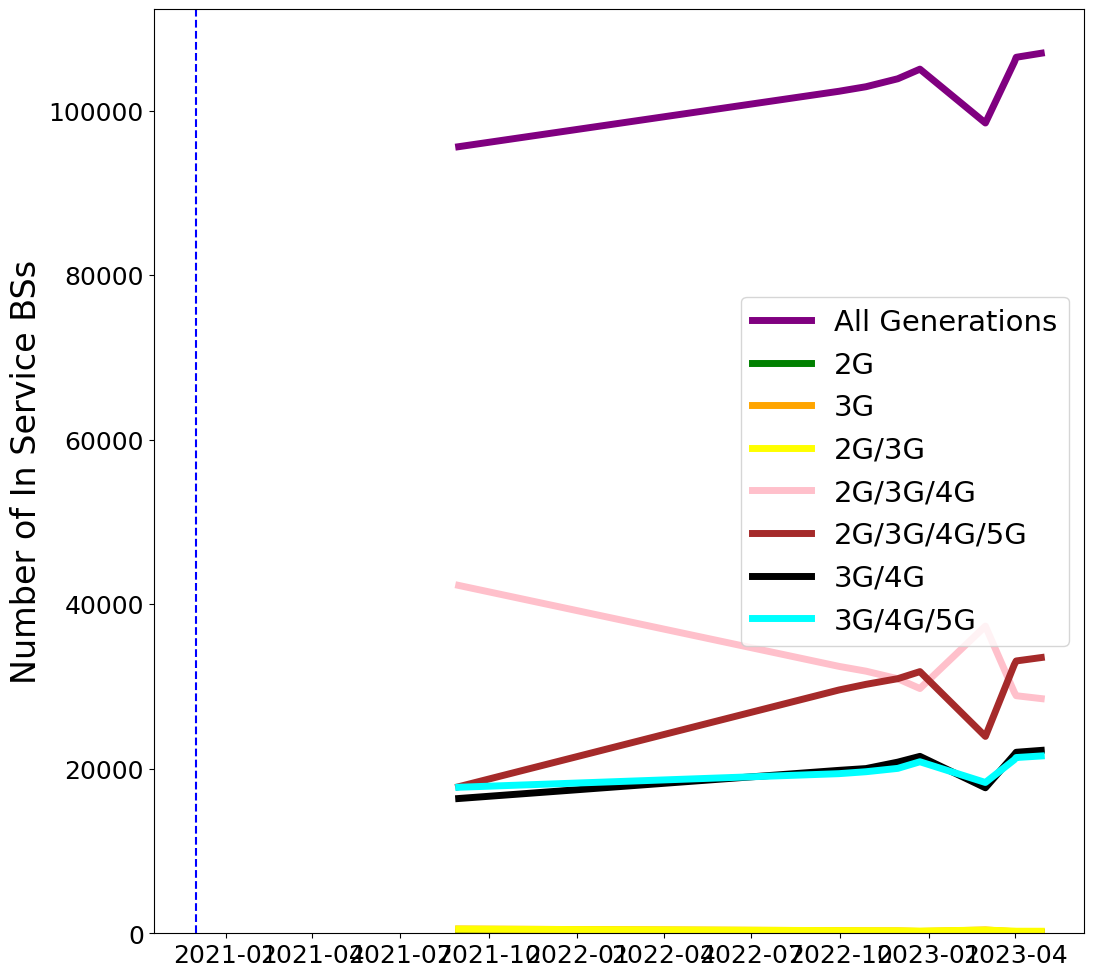

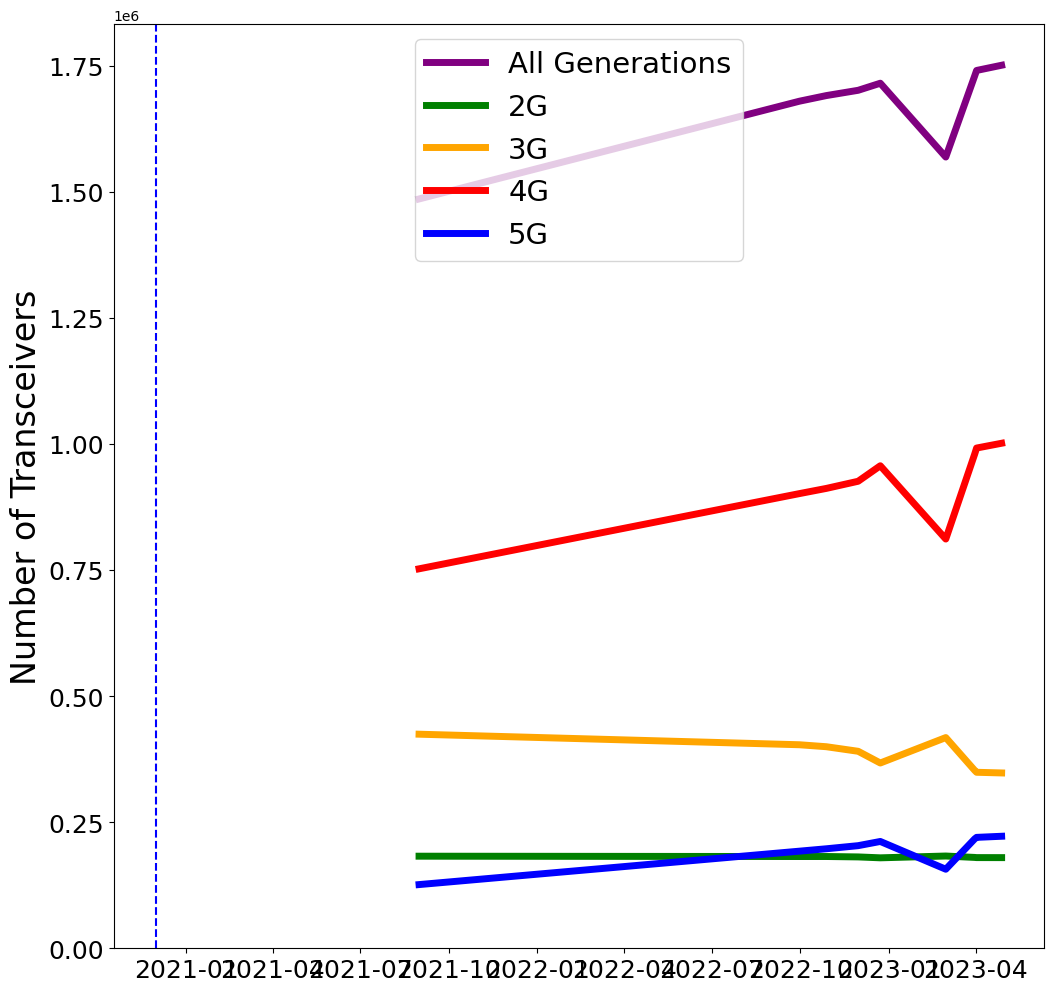

---------------TRX NUM TOTAL-----------------
[1485998, 1679860, 1691032, 1701485, 1715524, 1569126, 1729863, 1740848, 1751175]
---------------Compound Growth Rate-----------------
BS CAGR: 0.18340739367156944


ValueError: datetime.datetime(2020, 10, 30, 0, 0) is not in list

In [6]:
encoding_type = 'latin1'
pre_processed_dir = './Pre-processed data'

processed_files = [file for file in listdir(pre_processed_dir) if (isfile(join(pre_processed_dir, file))) and (file != 'NUM_STATIONS.txt')]

processed_files.sort()         #Will sort according to the date just in case it is not already sorted

print("------------------------ALL Pre-Processed Files------------------------")
print(processed_files)
print("-----------------------------------------------------------------------")

#-------------------------------------------------------------------------------------------#

total_bs_num_df = pd.read_csv(join(pre_processed_dir, 'NUM_STATIONS.txt'), sep = ';', encoding = encoding_type)         #Including those from the other operators
total_bs_num_df = processing_total_BS_num_df(total_bs_num_df)

total_bs_num = total_bs_num_df['Total_NUM_BSs'].tolist()


plt.rcParams["figure.figsize"] = (12,12)

dates = []

total_bs_num_main_opr = []
total_bs_num_SFR = []
total_bs_num_ORANGE = []
total_bs_num_BT = []
total_bs_num_FREE = []

#----Single type BSs only - Determined based on transceivers present on the base station----#
total_bs_num_2G = []
total_bs_num_3G = []
total_bs_num_4G = []
total_bs_num_5G = []
#----BSs running multiple technologies----#
total_bs_num_2G_3G = []
total_bs_num_2G_3G_4G = []
total_bs_num_2G_3G_4G_5G = []
total_bs_num_3G_4G = []
total_bs_num_3G_4G_5G = []
total_bs_num_4G_5G = []

total_bs_num_2G_4G = []
total_bs_num_2G_5G = []
total_bs_num_2G_4G_5G = []
total_bs_num_2G_3G_5G = []
total_bs_num_3G_5G = []

total_trx_num = []
trx_num_2G = []
trx_num_3G = []
trx_num_4G = []
trx_num_5G = []


print("----------------------Generating Time Series Graphs----------------------")
for file in processed_files:
    date = file.split('.')[0]
    dates.append(datetime.strptime(date, '%Y%m%d'))

    all_df = pd.read_csv(join(pre_processed_dir, file), sep = ';', dtype=str, encoding = encoding_type)

    BS_per_OPR_time_series(all_df, total_bs_num_main_opr, total_bs_num_ORANGE, total_bs_num_SFR, total_bs_num_BT, total_bs_num_FREE)
    BS_per_TECH_time_series(all_df, total_bs_num_2G, total_bs_num_3G, total_bs_num_4G, total_bs_num_5G, total_bs_num_2G_3G, total_bs_num_2G_3G_4G, total_bs_num_2G_3G_4G_5G, total_bs_num_3G_4G, total_bs_num_3G_4G_5G, total_bs_num_4G_5G, total_bs_num_2G_4G, total_bs_num_2G_5G, total_bs_num_2G_4G_5G, total_bs_num_2G_3G_5G, total_bs_num_3G_5G)
    TRX_per_TECH_time_series(all_df, total_trx_num, trx_num_2G, trx_num_3G, trx_num_4G, trx_num_5G)

    print('------------Currently Processing------------')
    print(file)

#-----------------Time Series Graph Showing BSs per Technology-----------------#
plot_BS_per_TECH_time_series(dates, total_bs_num_main_opr, total_bs_num_2G, total_bs_num_3G, total_bs_num_4G, total_bs_num_5G, total_bs_num_2G_3G, total_bs_num_2G_3G_4G, total_bs_num_2G_3G_4G_5G, total_bs_num_3G_4G, total_bs_num_3G_4G_5G, total_bs_num_4G_5G, total_bs_num_2G_4G, total_bs_num_2G_5G, total_bs_num_2G_4G_5G, total_bs_num_2G_3G_5G, total_bs_num_3G_5G)
#-----------------Time Series Graph Showing TRX per Technology-----------------#
plot_TRX_per_TECH_time_series(dates, total_trx_num, trx_num_2G, trx_num_3G, trx_num_4G, trx_num_5G)

print("---------------TRX NUM TOTAL-----------------")
print(total_trx_num)
print("---------------Compound Growth Rate-----------------")
BS_CGR(dates, total_bs_num_main_opr)
TRX_CGR(dates, total_trx_num)

In [7]:
%reset

from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join, isdir
import math

pre_processed_dir = './Pre-processed data'

processed_files = [file for file in listdir(pre_processed_dir) if (isfile(join(pre_processed_dir, file))) and (file != 'NUM_STATIONS.txt')]

processed_files.sort()         #Will sort according to the date just in case it is not already sorted

print("---------------------Pre-Processed files---------------------")
print(processed_files)
print("-------------------------------------------------------------")

---------------------Pre-Processed files---------------------
['20210831.txt', '20220930.txt', '20221028.txt', '20221130.txt', '20221223.txt', '20230301.txt', '20230331.txt', '20230402.txt', '20230428.txt']
-------------------------------------------------------------


In [8]:
def condense_TRX_info(all_df):
    all_df = all_df.drop(['ANT_TYPE', 'BW_UNIT'], axis = 1)    #Not using these columns.....unit is Mega for all

    all_df = all_df.groupby(['BS_ID','DoS','OPR_NAME','System','FDD_BW','TDD_BW'])[['TRX_ID']].count()
    all_df = all_df.reset_index(level=['BS_ID','DoS','OPR_NAME','System','FDD_BW','TDD_BW'])
    all_df = all_df.rename(columns={'TRX_ID': 'NUM_TRX'})
    return all_df

def create_BS_type_tech_mapping(all_df): #Integrated or RRH based Base Station #Also, which technology each station have
    station_systems_df = all_df[['BS_ID', 'System']].drop_duplicates(keep='first')
    #station_systems_df['Generations'] = all_df['System'].str.split(' ').str.get(0)

    station_systems_df['Generations'] = np.where(station_systems_df['System'] != '5G NR 3500',
                                                 station_systems_df['System'].str.split(' ').str.get(0),
                                                 station_systems_df['System'])
    station_systems_df = station_systems_df.drop(['System'], axis = 1)
    station_systems_df = station_systems_df.drop_duplicates(keep='first')
    groups = station_systems_df.groupby('BS_ID')['Generations'].apply(list)
    groups_keys = groups.keys()

    dictionary_type = {}
    dictionary_tech = {}

    dictionary_highest_tech = {}

    for key in groups_keys:
        systems = groups[key]
        if set(systems) == set(['GSM']):
            dictionary_type[key] = 'I'
            dictionary_tech[key] = '2G'
            dictionary_highest_tech[key] = 'H_2G'
        elif set(systems) == set(['UMTS']):
            dictionary_type[key] = 'I'
            dictionary_tech[key] = '3G'
            dictionary_highest_tech[key] = 'H_3G'
        elif set(systems) == set(['LTE']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '4G'
            dictionary_highest_tech[key] = 'H_4G'
        elif set(systems) == set(['5G']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '5G'
            dictionary_highest_tech[key] = 'H_5G'
        elif set(systems) == set(['5G NR 3500']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '5G'
            dictionary_highest_tech[key] = 'H_5G_3500'


        elif set(systems) == set(['GSM', 'UMTS']):
            dictionary_type[key] = 'I'
            dictionary_tech[key] = '2G/3G'
            dictionary_highest_tech[key] = 'H_3G'
        elif set(systems) == set(['GSM', 'UMTS', 'LTE']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '2G/3G/4G'
            dictionary_highest_tech[key] = 'H_4G'

        elif set(systems) == set(['GSM', 'UMTS', 'LTE', '5G']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '2G/3G/4G/5G'
            dictionary_highest_tech[key] = 'H_5G'
        elif set(systems) == set(['GSM', 'UMTS', 'LTE', '5G NR 3500']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '2G/3G/4G/5G'
            dictionary_highest_tech[key] = 'H_5G_3500'
        elif set(systems) == set(['GSM', 'UMTS', 'LTE', '5G', '5G NR 3500']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '2G/3G/4G/5G'
            dictionary_highest_tech[key] = 'H_5G_3500'

        elif set(systems) == set(['UMTS', 'LTE']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '3G/4G'
            dictionary_highest_tech[key] = 'H_4G'

        elif set(systems) == set(['UMTS', 'LTE', '5G']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '3G/4G/5G'
            dictionary_highest_tech[key] = 'H_5G'
        elif set(systems) == set(['UMTS', 'LTE', '5G NR 3500']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '3G/4G/5G'
            dictionary_highest_tech[key] = 'H_5G_3500'
        elif set(systems) == set(['UMTS', 'LTE', '5G', '5G NR 3500']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '3G/4G/5G'
            dictionary_highest_tech[key] = 'H_5G_3500'


        elif set(systems) == set(['LTE', '5G']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '4G/5G'
            dictionary_highest_tech[key] = 'H_5G'
        elif set(systems) == set(['LTE', '5G NR 3500']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '4G/5G'
            dictionary_highest_tech[key] = 'H_5G_3500'
        elif set(systems) == set(['LTE', '5G', '5G NR 3500']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '4G/5G'
            dictionary_highest_tech[key] = 'H_5G_3500'

        elif set(systems) == set(['GSM', 'LTE']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '2G/4G'
            dictionary_highest_tech[key] = 'H_4G'

        elif set(systems) == set(['GSM', '5G']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '2G/5G'
            dictionary_highest_tech[key] = 'H_5G'
        elif set(systems) == set(['GSM', '5G NR 3500']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '2G/5G'
            dictionary_highest_tech[key] = 'H_5G_3500'
        elif set(systems) == set(['GSM', '5G', '5G NR 3500']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '2G/5G'
            dictionary_highest_tech[key] = 'H_5G_3500'

        elif set(systems) == set(['GSM', 'LTE', '5G']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '2G/4G/5G'
            dictionary_highest_tech[key] = 'H_5G'
        elif set(systems) == set(['GSM', 'LTE', '5G NR 3500']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '2G/4G/5G'
            dictionary_highest_tech[key] = 'H_5G_3500'
        elif set(systems) == set(['GSM', 'LTE', '5G', '5G NR 3500']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '2G/4G/5G'
            dictionary_highest_tech[key] = 'H_5G_3500'

        elif set(systems) == set(['GSM', 'UMTS', '5G']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '2G/3G/5G'
            dictionary_highest_tech[key] = 'H_5G'
        elif set(systems) == set(['GSM', 'UMTS', '5G NR 3500']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '2G/3G/5G'
            dictionary_highest_tech[key] = 'H_5G_3500'
        elif set(systems) == set(['GSM', 'UMTS', '5G', '5G NR 3500']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '2G/3G/5G'
            dictionary_highest_tech[key] = 'H_5G_3500'

        elif set(systems) == set(['UMTS', '5G']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '3G/5G'
            dictionary_highest_tech[key] = 'H_5G'
        elif set(systems) == set(['UMTS', '5G NR 3500']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '3G/5G'
            dictionary_highest_tech[key] = 'H_5G_3500'
        elif set(systems) == set(['UMTS', '5G','5G NR 3500']):
            dictionary_type[key] = 'RRH'
            dictionary_tech[key] = '3G/5G'
            dictionary_highest_tech[key] = 'H_5G_3500'

    return (dictionary_type, dictionary_tech, dictionary_highest_tech)

def add_pw_cons_col(row, current_date):     #This function includes our assumptions related to power
    # consumption.
    num_trx = row['NUM_TRX']
    num_mimo_antenna = 1

    systems_mimo_2x2 = ['LTE 700', 'LTE 800','5G NR 700']                                #'5G NR 700'
    systems_mimo_4x4 = ['LTE 1800', 'LTE 2100', 'LTE 2600','5G NR 2100']                 #'5G NR 2100'

    if row['System'] in systems_mimo_2x2:
        num_mimo_antenna = 2
    elif row['System'] in systems_mimo_4x4:
        num_mimo_antenna = 4

    BS_type = row['BS_TYPE']
    TRX_tech = row['System']
    FDD_DL_BW = float(row['FDD_BW'])
    TDD_BW = float(row['TDD_BW'])
    Date_of_Service = row['DoS']

    return num_trx * num_mimo_antenna * pw_models(Date_of_Service, BS_type, TRX_tech, FDD_DL_BW, TDD_BW, current_date)

def pw_models(Date_of_Service, BS_type, TRX_tech, FDD_DL_BW, TDD_BW, current_date):

    load = 0.3                                           #Average load value to be multiplied with Pmax

    if TRX_tech != '5G NR 3500':           #If not 5G NR 3500 - #From AUER paper from 2011. This also cited in Lopez 2022
        P_max = 0

        #From Golard et al. (2022)
        #Based on DL BW (4 W per 1 MHz)
        P_max = FDD_DL_BW * 4

        if (FDD_DL_BW == 0):               #DL BW for TDD would be 0.
            P_max = TDD_BW * (2/3) * 4     #(2/3 * 4) W per 1 MHz

        #---------------------LOAD---------------------#
        P_max = P_max * load                                 #At 30 % load
        #-------------------------------------------------#

        sigma_feed = 0.5  #Mentioned in db in the paper but converted in Watts

        eta_PA = 0.311
        P_RF = 12.9
        P_BB = 29.6
        sigma_DC = 0.075
        sigma_cool = 0.1
        sigma_MS = 0.09

        if BS_type == 'RRH':
            sigma_cool = 0
            sigma_feed = 0.2                                #1 dB loss
        #------------------------Performance Improvements with time------------------------#
        dos_bs_year = (datetime.strptime(Date_of_Service, '%d/%m/%Y')).year    #Year when the BS came into service

        replace_period = 8                                                     #In years

        current_year = current_date.year

        BS_equip_year_last_updated = current_year - ((current_year - dos_bs_year) % replace_period)

        model_year = (datetime(2011, 1, 1)).year                               #Earth Model Year

        performance_diff_years = BS_equip_year_last_updated - model_year       #The values need to be updated for this many years

        for i in range(performance_diff_years):
            #Per year improvement of 2% in PA
            eta_PA = eta_PA * 1.02

            #Moore's law for the analog and digital circuitary. Applied every two years
            if ((i % 2 == 0) and (i != 0)):
                P_RF = P_RF / math.sqrt(2)         #Analog front-end
                P_BB = P_BB / 2                    #Digital Baseband. Every 2 years BB power gets halved.

        #----------------------------------------------------------------------------------#
        total_PA = P_max / ((eta_PA)*(1 - sigma_feed))
        TRX_PW_consumption = (total_PA + P_RF + P_BB) / ((1 - sigma_DC)*(1 - sigma_MS)*(1 - sigma_cool))

    else:                     #Case of 5G NR 3500 - Different Model from Tombaz et al. (2015) with no scaling
        P_max = 240           #This value is from Han et al. (2020)
        N_TRX = 64
        P_c = 1
        P_Base = 260
        eta_PA = 0.25
        #------------------------------------------------------------------------------------------------#

        P_Tx = (load * P_max)/eta_PA
        TRX_PW_consumption = P_Tx + (N_TRX * P_c) + P_Base

    return TRX_PW_consumption

def pw_per_opr(all_df, total_pw_main_opr, total_pw_ORANGE, total_pw_SFR, total_pw_BT, total_pw_FREE,
               BS_avg_pw_main_opr, BS_avg_pw_ORANGE, BS_avg_pw_SFR, BS_avg_pw_BT, BS_avg_pw_FREE):
    divider = 1000000         #For MW

    total_pw = (all_df["Calculated_Power"].sum())/divider
    total_pw_main_opr.append(total_pw)

    temp_df = all_df[['OPR_NAME', "Calculated_Power"]]
    opr_groups = temp_df.groupby('OPR_NAME')["Calculated_Power"].sum()

    ORANGE_pw = opr_groups['ORANGE']/divider
    SFR_pw = opr_groups['SFR']/divider
    BT_pw = opr_groups['BOUYGUES TELECOM']/divider
    FREE_pw = opr_groups['FREE MOBILE']/divider

    total_pw_ORANGE.append(ORANGE_pw)
    total_pw_SFR.append(SFR_pw)
    total_pw_BT.append(BT_pw)
    total_pw_FREE.append(FREE_pw)

    temp_df = all_df[['BS_ID', 'OPR_NAME']].drop_duplicates(keep='first')
    opr_groups = temp_df.groupby('OPR_NAME')['BS_ID'].count()

    total_BS_num = opr_groups['ORANGE'] + opr_groups['SFR'] + opr_groups['BOUYGUES TELECOM'] + opr_groups['FREE MOBILE']

    multiplier = 1000         #For converting from MW to KW

    BS_avg_pw_main_opr.append((total_pw / total_BS_num) * multiplier)
    BS_avg_pw_ORANGE.append((ORANGE_pw / opr_groups['ORANGE']) * multiplier)
    BS_avg_pw_SFR.append((SFR_pw / opr_groups['SFR']) * multiplier)
    BS_avg_pw_BT.append((BT_pw / opr_groups['BOUYGUES TELECOM']) * multiplier)
    BS_avg_pw_FREE.append((FREE_pw / opr_groups['FREE MOBILE']) * multiplier)

    return

def pw_per_tech(all_df, total_BS_pw_2G, total_BS_pw_3G, total_BS_pw_4G, total_BS_pw_5G, total_BS_pw_2G_3G,
               total_BS_pw_2G_3G_4G, total_BS_pw_2G_3G_4G_5G, total_BS_pw_3G_4G, total_BS_pw_3G_4G_5G,
               total_BS_pw_4G_5G, total_BS_pw_2G_4G, total_BS_pw_2G_5G, total_BS_pw_2G_4G_5G, total_BS_pw_2G_3G_5G,
                total_BS_pw_3G_5G):

    divider = 1000000         #For MW

    temp_df = all_df[['BS_TECH', "Calculated_Power"]]
    tech_groups = temp_df.groupby('BS_TECH')["Calculated_Power"].sum()

    pw_2G = tech_groups['2G']/divider
    pw_3G = tech_groups['3G']/divider
    pw_4G = tech_groups['4G']/divider
    pw_5G = 0
    pw_2G_3G = tech_groups['2G/3G']/divider
    pw_2G_3G_4G = tech_groups['2G/3G/4G']/divider
    pw_2G_3G_4G_5G = 0
    pw_3G_4G = tech_groups['3G/4G']/divider
    pw_3G_4G_5G = 0
    pw_4G_5G = 0

    pw_2G_4G = 0
    pw_2G_5G = 0
    pw_2G_4G_5G = 0
    pw_2G_3G_5G = 0
    pw_3G_5G = 0

    total_BS_pw_2G.append(pw_2G)
    total_BS_pw_3G.append(pw_3G)
    total_BS_pw_4G.append(pw_4G)
    #---if else for cases when there were no 5G BSs---#
    if '5G' in tech_groups.keys():
        pw_5G = tech_groups['5G']/divider
        total_BS_pw_5G.append(pw_5G)
    else:
        total_BS_pw_5G.append(0)

    total_BS_pw_2G_3G.append(pw_2G_3G)
    total_BS_pw_2G_3G_4G.append(pw_2G_3G_4G)

    if '2G/3G/4G/5G' in tech_groups.keys():
        pw_2G_3G_4G_5G = tech_groups['2G/3G/4G/5G']/divider
        total_BS_pw_2G_3G_4G_5G.append(pw_2G_3G_4G_5G)
    else:
        total_BS_pw_2G_3G_4G_5G.append(0)

    total_BS_pw_3G_4G.append(pw_3G_4G)

    if '3G/4G/5G' in tech_groups.keys():
        pw_3G_4G_5G = tech_groups['3G/4G/5G']/divider
        total_BS_pw_3G_4G_5G.append(pw_3G_4G_5G)
    else:
        total_BS_pw_3G_4G_5G.append(0)

    if '4G/5G' in tech_groups.keys():
        pw_4G_5G = tech_groups['4G/5G']/divider
        total_BS_pw_4G_5G.append(pw_4G_5G)
    else:
        total_BS_pw_4G_5G.append(0)

    if '2G/4G' in tech_groups.keys():
        pw_2G_4G = tech_groups['2G/4G']/divider
        total_BS_pw_2G_4G.append(pw_2G_4G)
    else:
        total_BS_pw_2G_4G.append(0)

    if '2G/5G' in tech_groups.keys():
        pw_2G_5G = tech_groups['2G/5G']/divider
        total_BS_pw_2G_5G.append(pw_2G_5G)
    else:
        total_BS_pw_2G_5G.append(0)

    if '2G/4G/5G' in tech_groups.keys():
        pw_2G_4G_5G = tech_groups['2G/4G/5G']/divider
        total_BS_pw_2G_4G_5G.append(pw_2G_4G_5G)
    else:
        total_BS_pw_2G_4G_5G.append(0)

    if '2G/3G/5G' in tech_groups.keys():
        pw_2G_3G_5G = tech_groups['2G/3G/5G']/divider
        total_BS_pw_2G_3G_5G.append(pw_2G_3G_5G)
    else:
        total_BS_pw_2G_3G_5G.append(0)

    if '3G/5G' in tech_groups.keys():
        pw_3G_5G = tech_groups['3G/5G']/divider
        total_BS_pw_3G_5G.append(pw_3G_5G)
    else:
        total_BS_pw_3G_5G.append(0)

    return

def avg_pw_per_freq_num(all_df, BS_avg_pw_1_freq_sys, BS_avg_pw_2_freq_sys, BS_avg_pw_3_freq_sys, BS_avg_pw_4_freq_sys,
                       BS_avg_pw_5_freq_sys, BS_avg_pw_6_freq_sys, BS_avg_pw_7_freq_sys, BS_avg_pw_8_freq_sys, BS_avg_pw_9_freq_sys,
                       BS_avg_pw_10_freq_sys, BS_avg_pw_11_freq_sys):
    temp_df = all_df[['BS_ID', 'System', "Calculated_Power"]]
    groups_BS = temp_df.groupby('BS_ID').aggregate({"System": "count", "Calculated_Power": "sum"})
    temp_df = groups_BS.reset_index(level=['BS_ID'])    #one row have the BS_ID, System Count (Only unique count) and Total Power

    groups_sys_count = temp_df.groupby('System').aggregate({"BS_ID": "count", "Calculated_Power": "sum"})
    temp_df = groups_sys_count.reset_index(level=['System'])
    #print(temp_df)

    pw_freq_1 = temp_df.loc[temp_df['System'] == 1]["Calculated_Power"] / temp_df.loc[temp_df['System'] == 1]['BS_ID']
    pw_freq_2 = temp_df.loc[temp_df['System'] == 2]["Calculated_Power"] / temp_df.loc[temp_df['System'] == 2]['BS_ID']
    pw_freq_3 = temp_df.loc[temp_df['System'] == 3]["Calculated_Power"] / temp_df.loc[temp_df['System'] == 3]['BS_ID']
    pw_freq_4 = temp_df.loc[temp_df['System'] == 4]["Calculated_Power"] / temp_df.loc[temp_df['System'] == 4]['BS_ID']
    pw_freq_5 = temp_df.loc[temp_df['System'] == 5]["Calculated_Power"] / temp_df.loc[temp_df['System'] == 5]['BS_ID']
    pw_freq_6 = temp_df.loc[temp_df['System'] == 6]["Calculated_Power"] / temp_df.loc[temp_df['System'] == 6]['BS_ID']
    pw_freq_7 = temp_df.loc[temp_df['System'] == 7]["Calculated_Power"] / temp_df.loc[temp_df['System'] == 7]['BS_ID']
    pw_freq_8 = temp_df.loc[temp_df['System'] == 8]["Calculated_Power"] / temp_df.loc[temp_df['System'] == 8]['BS_ID']
    pw_freq_9 = temp_df.loc[temp_df['System'] == 9]["Calculated_Power"] / temp_df.loc[temp_df['System'] == 9]['BS_ID']
    pw_freq_10 = temp_df.loc[temp_df['System'] == 10]["Calculated_Power"] / temp_df.loc[temp_df['System'] == 10]['BS_ID']
    pw_freq_11 = temp_df.loc[temp_df['System'] == 11]["Calculated_Power"] / temp_df.loc[temp_df['System'] == 11]['BS_ID']

    divider = 1000    #For kW

    BS_avg_pw_1_freq_sys.append(pw_freq_1 / divider)
    BS_avg_pw_2_freq_sys.append(pw_freq_2 / divider)
    BS_avg_pw_3_freq_sys.append(pw_freq_3 / divider)
    BS_avg_pw_4_freq_sys.append(pw_freq_4 / divider)
    BS_avg_pw_5_freq_sys.append(pw_freq_5 / divider)
    BS_avg_pw_6_freq_sys.append(pw_freq_6 / divider)
    BS_avg_pw_7_freq_sys.append(pw_freq_7 / divider)
    BS_avg_pw_8_freq_sys.append(pw_freq_8 / divider)
    BS_avg_pw_9_freq_sys.append(pw_freq_9 / divider)
    BS_avg_pw_10_freq_sys.append(pw_freq_10 / divider)
    BS_avg_pw_11_freq_sys.append(pw_freq_11 / divider)

    return

def avg_pw_per_highest_tech(all_df, BS_avg_pw_H_2G, BS_avg_pw_H_3G, BS_avg_pw_H_4G, BS_avg_pw_H_5G, BS_avg_pw_H_5G_3500):
    temp_df = all_df[['BS_H_TECH', "Calculated_Power"]]
    tech_groups = temp_df.groupby('BS_H_TECH')["Calculated_Power"].sum()

    divider = 1000000                                           #For MW
    pw_H_2G = tech_groups['H_2G']/divider
    pw_H_3G = tech_groups['H_3G']/divider
    pw_H_4G = tech_groups['H_4G']/divider
    pw_H_5G = 0
    pw_H_5G_3500 = 0

    #---if else for cases when there were no 5G BSs---#
    if 'H_5G' in tech_groups.keys():
        pw_H_5G = tech_groups['H_5G']/divider
    if 'H_5G_3500' in tech_groups.keys():
        pw_H_5G_3500 = tech_groups['H_5G_3500']/divider


    temp_df = all_df[['BS_ID', 'BS_H_TECH']].drop_duplicates(keep='first')
    tech_groups = temp_df.groupby('BS_H_TECH')['BS_ID'].count()

    multiplier = 1000         #For converting from MW to KW

    BS_avg_pw_H_2G.append((pw_H_2G/tech_groups['H_2G']) * multiplier)
    BS_avg_pw_H_3G.append((pw_H_3G/tech_groups['H_3G']) * multiplier)
    BS_avg_pw_H_4G.append((pw_H_4G/tech_groups['H_4G']) * multiplier)
    #BS_avg_pw_H_5G.append((pw_5G/tech_groups['H_5G']) * multiplier)
    #BS_avg_pw_H_5G_3500.append((pw_H_5G_3500/tech_groups['H_5G_3500']) * multiplier)

    if 'H_5G' in tech_groups.keys():
        BS_avg_pw_H_5G.append((pw_H_5G/tech_groups['H_5G']) * multiplier)
    else:
        BS_avg_pw_H_5G.append(0)

    if 'H_5G_3500' in tech_groups.keys():
        BS_avg_pw_H_5G_3500.append((pw_H_5G_3500/tech_groups['H_5G_3500']) * multiplier)
    else:
        BS_avg_pw_H_5G_3500.append(0)

    return

def plot_pw_per_tech_timeseries(dates, total_pw_main_opr, total_BS_pw_2G, total_BS_pw_3G, total_BS_pw_4G, total_BS_pw_5G,
                            total_BS_pw_2G_3G, total_BS_pw_2G_3G_4G, total_BS_pw_2G_3G_4G_5G, total_BS_pw_3G_4G,
                            total_BS_pw_3G_4G_5G, total_BS_pw_4G_5G, total_BS_pw_2G_4G, total_BS_pw_2G_5G,
                            total_BS_pw_2G_4G_5G, total_BS_pw_2G_3G_5G, total_BS_pw_3G_5G):
    plt.plot(dates, total_pw_main_opr, color='purple', label='All Generations', linewidth=5)

    plt.plot(dates, total_BS_pw_2G, color='green', label='2G', linewidth=5)

    plt.plot(dates, total_BS_pw_3G, color='orange', label='3G', linewidth=5)

    plt.plot(dates, total_BS_pw_2G_3G, color='yellow', label='2G/3G', linewidth=5)

    plt.plot(dates, total_BS_pw_2G_3G_4G, color='pink', label='2G/3G/4G', linewidth=5)

    plt.plot(dates, total_BS_pw_2G_3G_4G_5G, color='brown', label='2G/3G/4G/5G', linewidth=5)

    plt.plot(dates, total_BS_pw_3G_4G, color='black', label='3G/4G', linewidth=5)

    plt.plot(dates, total_BS_pw_3G_4G_5G, color='cyan', label='3G/4G/5G', linewidth=5)

    plt.axvline(x = datetime(2020, 12, 1), color = 'b', linestyle='dashed')

    plt.legend(fontsize=21)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    plt.ylabel("Total BS Power Consumption (MW)", fontsize=24)

    plt.ylim(ymin = 0)
    # Save Image
    plt.savefig('./Graphs/BSs_PW_by_Technology.pdf')
    # Show graphic
    plt.show()

    return

def plot_avg_pw_per_BS_freq_sys_num_monthwise(dates, BS_avg_pw_1_freq_sys, BS_avg_pw_2_freq_sys, BS_avg_pw_3_freq_sys,
                                                BS_avg_pw_4_freq_sys, BS_avg_pw_5_freq_sys, BS_avg_pw_6_freq_sys,
                                                BS_avg_pw_7_freq_sys, BS_avg_pw_8_freq_sys, BS_avg_pw_9_freq_sys,
                                                BS_avg_pw_10_freq_sys, BS_avg_pw_11_freq_sys):

    for i in range(len(BS_avg_pw_9_freq_sys)):
        if BS_avg_pw_9_freq_sys[i].empty:
            BS_avg_pw_9_freq_sys[i] = pd.Series(np.array([0]))          #Adding a series with one item which is zero to keep the format consistent
        if BS_avg_pw_10_freq_sys[i].empty:
            BS_avg_pw_10_freq_sys[i] = pd.Series(np.array([0]))
        if BS_avg_pw_11_freq_sys[i].empty:
            BS_avg_pw_11_freq_sys[i] = pd.Series(np.array([0]))

    last_ind = len(BS_avg_pw_1_freq_sys) - 1
    for i in range(len(dates)):
        if ((dates[i].year == 2022) and (dates[i].month == 9)):
            last_ind = i

    pw_values = [BS_avg_pw_1_freq_sys[last_ind].item(), BS_avg_pw_2_freq_sys[last_ind].item(), BS_avg_pw_3_freq_sys[last_ind].item(), BS_avg_pw_4_freq_sys[last_ind].item(), BS_avg_pw_5_freq_sys[last_ind].item(), BS_avg_pw_6_freq_sys[last_ind].item(), BS_avg_pw_7_freq_sys[last_ind].item(), BS_avg_pw_8_freq_sys[last_ind].item(), BS_avg_pw_9_freq_sys[last_ind].item(), BS_avg_pw_10_freq_sys[last_ind].item(), BS_avg_pw_11_freq_sys[last_ind].item()]
    labels = ['1','2','3','4','5','6','7','8','9','10','11']

    # creating the bar plot
    plt.bar(labels, pw_values, color='blue', width = 0.6)

    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    plt.ylabel("Average BS Power Consumption (KW)", fontsize=24)
    plt.xlabel('Number of Frequencies per BS', fontsize=24)

    plt.ylim(ymin = 0)
    # Save Image
    plt.savefig('./Graphs/BSs_AVG_PW_by_Freq_Sys_Num_Monthwise.pdf')
    # Show graphic
    plt.show()

    return

def plot_avg_pw_per_highest_BS_tech_monthwise(dates, BS_avg_pw_main_opr, BS_avg_pw_H_2G, BS_avg_pw_H_3G, BS_avg_pw_H_4G, BS_avg_pw_H_5G, BS_avg_pw_H_5G_3500):
    last_ind = len(BS_avg_pw_main_opr) - 1
    for i in range(len(dates)):
        if ((dates[i].year == 2022) and (dates[i].month == 9)):
            last_ind = i


    pw_values = [BS_avg_pw_main_opr[last_ind], BS_avg_pw_H_2G[last_ind], BS_avg_pw_H_3G[last_ind], BS_avg_pw_H_4G[last_ind], BS_avg_pw_H_5G[last_ind], BS_avg_pw_H_5G_3500[last_ind]]
    labels = ["All Generations", "2G", "3G", "4G", "5G\n(700 &\n2100 MHz)", "5G\n(3500 MHz)"]

    # creating the bar plot
    plt.bar(labels, pw_values, color='lightcoral', width = 0.8)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    plt.ylabel("Average BS Power Consumption (KW)", fontsize=24)
    plt.xlabel('Highest BS Technology', fontsize=24)
    #plt.title('Average BS Power Consumption by Technology at 30% load in France* (August 2022)', fontsize=16)

    plt.ylim(ymin = 0)
    # Save Image
    plt.savefig('./Graphs/BSs_AVG_PW_by_Highest_Tech_MonthWise.pdf')
    # Show graphic
    plt.show()

    return

def CAGR(dates, total_pw_main_opr, BS_avg_pw_main_opr):
    #---------------------------FOR TOTAL---------------------------#
    final_val = total_pw_main_opr[len(total_pw_main_opr) - 1]

    initial_val = total_pw_main_opr[0]
    time_months = len(dates) - 1                    #minus 1 because the first date is the starting point
    time_years = time_months / 12

    cagr = ((final_val/initial_val)**(1/time_years)) - 1
    print ('BS Total Power CAGR:', cagr)

    #After 5G
    start_date_5G_index = dates.index(datetime(2020, 10, 30))
    initial_val_5G = total_pw_main_opr[start_date_5G_index]

    time_months = (len(dates) - start_date_5G_index) - 1           #minus 1 because the first date is the starting point
    time_years = time_months / 12

    cagr_5G = ((final_val/initial_val_5G)**(1/time_years)) - 1
    print ('BS Total Power CAGR after 5G:', cagr_5G)

    #---------------------------FOR Average---------------------------#


    final_val = BS_avg_pw_main_opr[len(BS_avg_pw_main_opr) - 1]

    initial_val = BS_avg_pw_main_opr[0]
    time_months = len(dates) - 1                    #minus 1 because the first date is the starting point
    time_years = time_months / 12

    cagr = ((final_val/initial_val)**(1/time_years)) - 1
    print ('BS Average Power CAGR:', cagr)

    #After 5G
    start_date_5G_index = dates.index(datetime(2020, 10, 30))
    initial_val_5G = BS_avg_pw_main_opr[start_date_5G_index]

    time_months = (len(dates) - start_date_5G_index) - 1            #minus 1 because the first date is the starting point
    time_years = time_months / 12

    cagr_5G = ((final_val/initial_val_5G)**(1/time_years)) - 1
    print ('BS Average Power CAGR after 5G:', cagr_5G)
    print('--------------------------------------------------------')
    print('BS Average Power starting value:', BS_avg_pw_main_opr[0])
    print('BS Average Power ending value:', BS_avg_pw_main_opr[len(BS_avg_pw_main_opr) - 1])

    return

In [9]:
encoding_type = 'latin1'

dates = []

total_pw_main_opr = []

total_pw_SFR = []
total_pw_ORANGE = []
total_pw_BT = []
total_pw_FREE = []

#----Single type BSs only - Determined based on transceivers present on the base station----#
total_BS_pw_2G = []
total_BS_pw_3G = []
total_BS_pw_4G = []
total_BS_pw_5G = []
#----BSs running multiple technologies----#
total_BS_pw_2G_3G = []
total_BS_pw_2G_3G_4G = []
total_BS_pw_2G_3G_4G_5G = []
total_BS_pw_3G_4G = []
total_BS_pw_3G_4G_5G = []
total_BS_pw_4G_5G = []

total_BS_pw_2G_4G = []
total_BS_pw_2G_5G = []
total_BS_pw_2G_4G_5G = []
total_BS_pw_2G_3G_5G = []
total_BS_pw_3G_5G = []

#----Average Power Consumption per BS----#
BS_avg_pw_main_opr = []
BS_avg_pw_SFR = []
BS_avg_pw_ORANGE = []
BS_avg_pw_BT = []
BS_avg_pw_FREE = []

#----Average BS Power Consumption for each highest BS technology type----#
BS_avg_pw_H_2G = []
BS_avg_pw_H_3G = []
BS_avg_pw_H_4G = []
BS_avg_pw_H_5G = []            #Till 5G NR 700 & 5G NR 2100
BS_avg_pw_H_5G_3500 = []


#----Average Power Consumption for each BS (based on the # of frequencies)----#
BS_avg_pw_1_freq_sys = []
BS_avg_pw_2_freq_sys = []
BS_avg_pw_3_freq_sys = []
BS_avg_pw_4_freq_sys = []
BS_avg_pw_5_freq_sys = []
BS_avg_pw_6_freq_sys = []
BS_avg_pw_7_freq_sys = []
BS_avg_pw_8_freq_sys = []
BS_avg_pw_9_freq_sys = []
BS_avg_pw_10_freq_sys = []
BS_avg_pw_11_freq_sys = []


plt.rcParams["figure.figsize"] = (12,12)        #Setting plot size

for file in processed_files:
    print('------------Currently Processing------------')
    print(file)
    print('--------------------------------------------')

    date = file.split('.')[0]
    dates.append(datetime.strptime(date, '%Y%m%d'))

    #-------------Reading the current preprocessed file-------------#
    all_df = pd.read_csv(join(pre_processed_dir, file), sep = ';', dtype=str, encoding = encoding_type)

    #------------Condensing data more by introducing a count column for TRX with exactly same characteristics------------#
    all_df = condense_TRX_info(all_df)

    #------------Creating three dictionaries------------#
    #------------One to know the BS type (integrated or RRH based) which will be used during power calc------------#
    #------------One to know the BS tech (2G, 3G, 2G/3G and so on)------------#
    #------------One to know the highest BS tech (2G, 3G(2G + 2G/3G), 4G(2G + 2G/3G + 2G/3G/4G + 2G/4G + 3G/4G) and so on)------------#
    BS_dicts = create_BS_type_tech_mapping(all_df)
    BS_type_dict = BS_dicts[0]
    BS_tech_dict = BS_dicts[1]
    BS_highest_tech_dict = BS_dicts[2]
    #------------Using the dicts to add columns in the main dataframe------------#
    all_df['BS_TYPE'] = all_df['BS_ID'].map(BS_type_dict)
    all_df['BS_TECH'] = all_df['BS_ID'].map(BS_tech_dict)
    all_df['BS_H_TECH'] = all_df['BS_ID'].map(BS_highest_tech_dict)

    #------------Adding a power consumption column-------------#
    all_df["Calculated_Power"] = all_df.apply(add_pw_cons_col, current_date = datetime.strptime(date, '%Y%m%d'), axis=1) #Calculating the power consumption for each row

    #------------Gathering power consumption stats for different groups------------#
    pw_per_opr(all_df, total_pw_main_opr, total_pw_ORANGE, total_pw_SFR, total_pw_BT, total_pw_FREE,
              BS_avg_pw_main_opr, BS_avg_pw_ORANGE, BS_avg_pw_SFR, BS_avg_pw_BT, BS_avg_pw_FREE)

    pw_per_tech(all_df, total_BS_pw_2G, total_BS_pw_3G, total_BS_pw_4G, total_BS_pw_5G, total_BS_pw_2G_3G,
               total_BS_pw_2G_3G_4G, total_BS_pw_2G_3G_4G_5G, total_BS_pw_3G_4G, total_BS_pw_3G_4G_5G,
               total_BS_pw_4G_5G, total_BS_pw_2G_4G, total_BS_pw_2G_5G, total_BS_pw_2G_4G_5G, total_BS_pw_2G_3G_5G,
                total_BS_pw_3G_5G)

    avg_pw_per_freq_num(all_df, BS_avg_pw_1_freq_sys, BS_avg_pw_2_freq_sys, BS_avg_pw_3_freq_sys, BS_avg_pw_4_freq_sys,
                       BS_avg_pw_5_freq_sys, BS_avg_pw_6_freq_sys, BS_avg_pw_7_freq_sys, BS_avg_pw_8_freq_sys, BS_avg_pw_9_freq_sys,
                       BS_avg_pw_10_freq_sys, BS_avg_pw_11_freq_sys)

    avg_pw_per_highest_tech(all_df, BS_avg_pw_H_2G, BS_avg_pw_H_3G, BS_avg_pw_H_4G, BS_avg_pw_H_5G, BS_avg_pw_H_5G_3500)

------------Currently Processing------------
20210831.txt
--------------------------------------------
------------Currently Processing------------
20220930.txt
--------------------------------------------
------------Currently Processing------------
20221028.txt
--------------------------------------------
------------Currently Processing------------
20221130.txt
--------------------------------------------
------------Currently Processing------------
20221223.txt
--------------------------------------------
------------Currently Processing------------
20230301.txt
--------------------------------------------
------------Currently Processing------------
20230331.txt
--------------------------------------------
------------Currently Processing------------
20230402.txt
--------------------------------------------
------------Currently Processing------------
20230428.txt
--------------------------------------------
